<a href="https://www.kaggle.com/code/baweseh/dog-vs-cat-classification?scriptVersionId=194484344" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dog-vs-cat/animal/dog/00985-127787239.png
/kaggle/input/dog-vs-cat/animal/dog/00667-3846168829.png
/kaggle/input/dog-vs-cat/animal/dog/00891-3846169053.png
/kaggle/input/dog-vs-cat/animal/dog/00528-3846168690.png
/kaggle/input/dog-vs-cat/animal/dog/00689-3846168851.png
/kaggle/input/dog-vs-cat/animal/dog/00593-3846168755.png
/kaggle/input/dog-vs-cat/animal/dog/00894-3846169056.png
/kaggle/input/dog-vs-cat/animal/dog/00622-3846168784.png
/kaggle/input/dog-vs-cat/animal/dog/00907-3846169069.png
/kaggle/input/dog-vs-cat/animal/dog/00983-127787237.png
/kaggle/input/dog-vs-cat/animal/dog/00817-3846168979.png
/kaggle/input/dog-vs-cat/animal/dog/00576-3846168738.png
/kaggle/input/dog-vs-cat/animal/dog/00620-3846168782.png
/kaggle/input/dog-vs-cat/animal/dog/00940-3846169102.png
/kaggle/input/dog-vs-cat/animal/dog/00931-3846169093.png
/kaggle/input/dog-vs-cat/animal/dog/00904-3846169066.png
/kaggle/input/dog-vs-cat/animal/dog/00996-127787250.png
/kaggle/input/dog-vs-cat/animal/do

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras import models, layers
import tensorflow as tf   

In [3]:
IMAGE_SIZE = 224
BATCH_SIZE = 32
EPOCHS = 50
CHANNELS = 3 # Height x weight x color

dataset = tf.keras.preprocessing.image_dataset_from_directory("/kaggle/input/dog-vs-cat/animal",
                                                             shuffle = True,
                                                             image_size=(IMAGE_SIZE, IMAGE_SIZE),
                                                              batch_size =BATCH_SIZE
                                                             )

Found 1000 files belonging to 2 classes.


In [4]:
class_names = dataset.class_names
class_names # what are the classes the data belongs 

['cat', 'dog']

In [5]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch[0].numpy()) # representation of the first image in tensors form /matrix

[[[ 66.62245   92.04082   90.86735 ]
  [ 56.2602    89.90306   84.54591 ]
  [ 27.239794  51.73979   47.02551 ]
  ...
  [ 61.25996   81.606895  63.68851 ]
  [ 39.550964  51.086594  34.530502]
  [ 27.066458  37.270523  22.933542]]

 [[ 40.515305  53.892853  48.867344]
  [ 30.489786  56.57652   47.433666]
  [ 16.42347   29.60714   27.494896]
  ...
  [ 55.928307  76.88753   66.21402 ]
  [ 31.423386  45.770245  30.974352]
  [ 17.928604  30.408272  16.117239]]

 [[ 20.867346  38.92857   27.719387]
  [ 10.994898  21.158161  15.413263]
  [ 17.362246  20.933674  18.505102]
  ...
  [ 17.59679   28.525448  12.407998]
  [ 20.260317  34.061394  11.913381]
  [ 35.101772  53.31074   22.74456 ]]

 ...

 [[176.66849  163.88783  153.23988 ]
  [175.1531   161.62245  153.29594 ]
  [167.32674  153.18901  147.7757  ]
  ...
  [192.45448  179.88301  172.81169 ]
  [194.21452  183.13293  175.52576 ]
  [187.24063  174.74571  167.76086 ]]

 [[173.26031  161.80623  152.02055 ]
  [173.41824  161.34174  152.74992 ]


In [6]:
# what are the shape of the images

print(image_batch[0].shape)

(224, 224, 3)


# <font color =red>  Time to visualize some of the images in the dataset

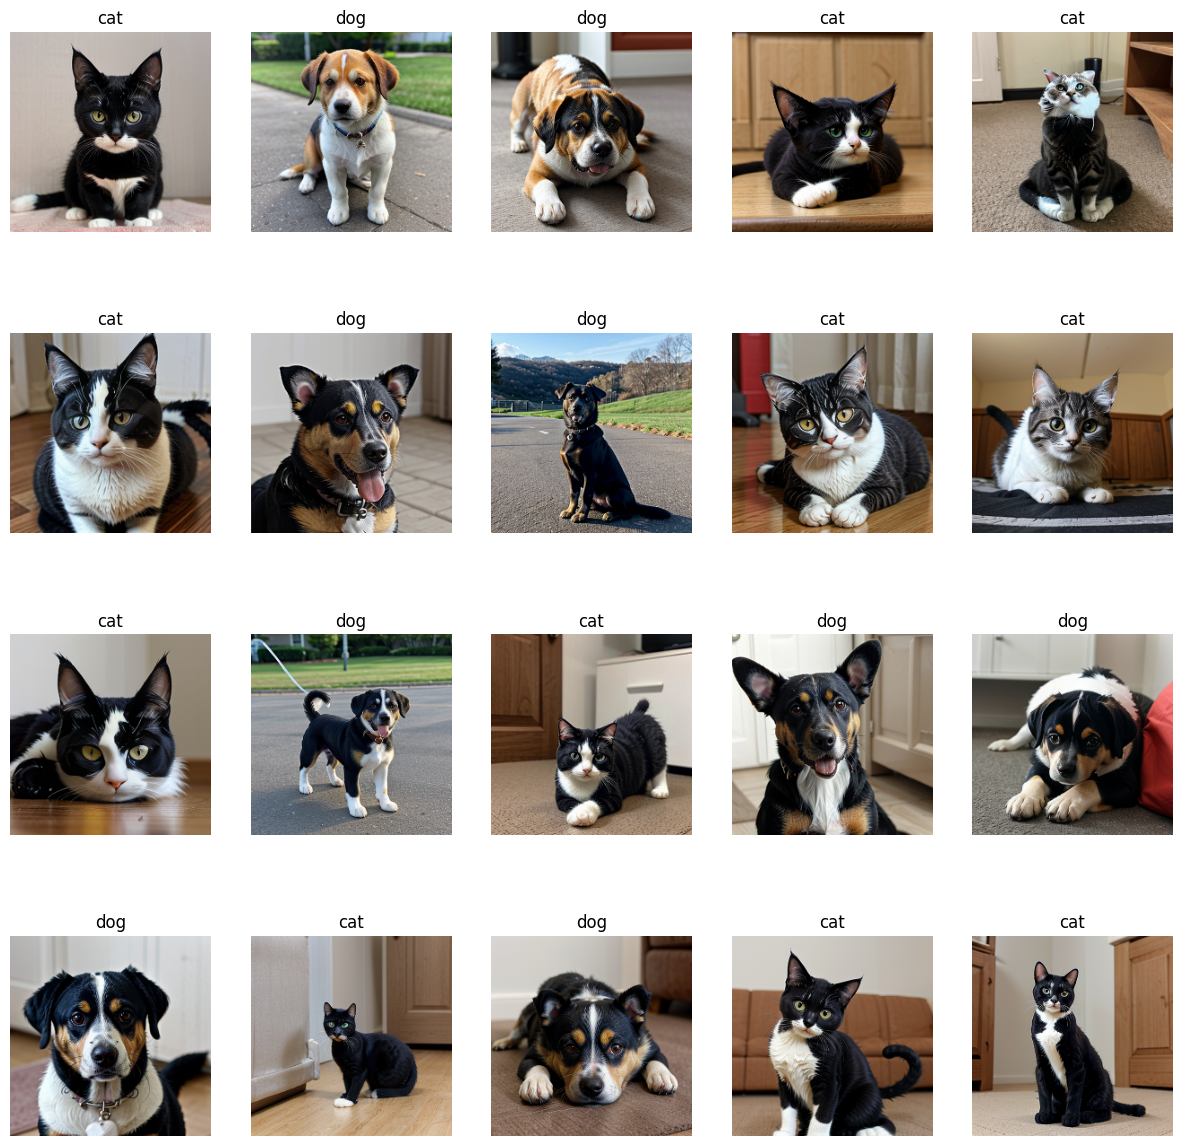

In [7]:
plt.figure(figsize=( 15, 15))

for image_batch, label_batch in dataset.take(1):
    for j in range(20): # Showing 20 images from among the dadtaset in the two classes
        ax = plt.subplot(4,5, j+1)
        
        plt.imshow(image_batch[j].numpy().astype("uint8"))
        plt.title(class_names[label_batch[j]])
        
        plt.axis(False) # do not show axis for the images
    

# <font color = red> Splitting the data into train, test and validation data for training and testing the efficacy of the model
    
   The data will be splitted according to the following ration:
    
   train = 0.7
    
   test = 0.15
    
   validation = 0.15

In [8]:
# Function to split the data

def get_data_splitting_tf(dataset,
                      train_split = 0.7,
                      test_split = 0.15,
                      val_split = 0.15,
                      shuffle = True, # data will be shuffle show that no particular image in sellected more than once durring the splitting
                      shuffle_size = 100000 # 
                      ):
    
    
    data_size = len(dataset)
    if shuffle:
        
        dataset = dataset.shuffle(shuffle_size, seed = 42)
    train_size = int(train_split * data_size)  
    
    test_size = int(test_split * data_size)
    
    train_dataset = dataset.take(train_size)
    test_dataset = dataset.skip(train_size).take(test_size) # the test data will skip the data in the train dataset
    
    val_dataset = dataset.skip(train_size).skip(test_size) # this will also skip all the dataset that has already been selected by the test and train size
    
    return train_dataset, test_dataset, val_dataset

In [9]:
train_dataset , test_dataset , val_dataset = get_data_splitting_tf(dataset)

In [10]:
# checking the length of the splitted datasets

len(train_dataset) # the length of the dataset in put according to the number of bacthes


22

In [11]:
len(test_dataset)


4

In [12]:
len(val_dataset)

6

In [13]:
# Here all the indivuidually splittted data will be shuffle

train_dataset = train_dataset.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

test_dataset = test_dataset.cache().shuffle(1000).prefetch(buffer_size =  tf.data.AUTOTUNE)

val_dataset = val_dataset.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

## <font color = red> Rescaling and Data augmentation

In [14]:
rescale_and_resize = tf.keras.Sequential([
    layers.Rescaling(1.0/255),
    layers.Resizing(IMAGE_SIZE, IMAGE_SIZE)
]) # Rescale and resizing the data

# Data augmentation is done toe to introduce the data to different orrientations and also increase the size of the dataset

data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("Horizontal_and_verrtical"),
    layers.RandomRotation(0.3)
])

# <font color = red>  Building the model

In [15]:
IMAGE_SIZE = 256
BATCH_SIZE = 32 #
EPOCHS = 50 # number of training iterations
CHANNELS = 3


input_shape  = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)

num_classes = 2 # this is the number of classes contained in the dataset


model = models.Sequential([
    data_augmentation,
    rescale_and_resize,
    
    layers.Conv2D(32, kernel_size = (3,3), activation  = 'relu', input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(128, kernel_size = (3,3), activation = 'relu', input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    
    
    layers.Conv2D( 128, kernel_size = (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(128, kernel_size = (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(128, kernel_size = (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Flatten(),
    
    layers.Dense(128, activation = 'relu'),
    
    layers.Dense(num_classes, activation = 'softmax'),
    
    
])


model.build(input_shape = input_shape)

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
# Summary of the model

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_1 (Sequential)       │ (32, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential (Sequential)         │ (32, 224, 224, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (32, 222, 222, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (32, 111, 111, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (32, 109, 109, 128)    │        36,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (32, 54, 54, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (32, 52, 52, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (32, 26, 26, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (32, 24, 24, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (32, 12, 12, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (32, 10, 10, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (32, 5, 5, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (32, 3200)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (32, 128)              │       409,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (32, 2)                │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 890,626 (3.40 MB)

 Trainable params: 890,626 (3.40 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
# model compilation

model.compile(
optimizer = # 'Adam',
tf.keras.optimizers.Adam(learning_rate = 1e-4),
    
loss  = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = False),
metrics = ['accuracy']
    
    
)

In [18]:
# Traing the model

history = model.fit(
                   train_dataset,
                   epochs = EPOCHS,
                   batch_size = BATCH_SIZE,
                   verbose = 1,
                   validation_data = val_dataset
                   )

Epoch 1/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 71s 3s/step - accuracy: 0.4916 - loss: 0.6920 - val_accuracy: 0.5260 - val_loss: 0.6779
Epoch 2/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 58s 3s/step - accuracy: 0.5483 - loss: 0.6788 - val_accuracy: 0.6094 - val_loss: 0.6470
Epoch 3/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 59s 3s/step - accuracy: 0.6422 - loss: 0.6343 - val_accuracy: 0.6667 - val_loss: 0.5876
Epoch 4/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 82s 3s/step - accuracy: 0.7272 - loss: 0.5750 - val_accuracy: 0.6823 - val_loss: 0.5660
Epoch 5/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 59s 3s/step - accuracy: 0.7233 - loss: 0.5243 - val_accuracy: 0.7240 - val_loss: 0.5305
Epoch 6/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 59s 3s/step - accuracy: 0.7823 - loss: 0.4838 - val_accuracy: 0.7083 - val_loss: 0.5874
Epoch 7/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 59s 3s/step - accuracy: 0.7726 - loss: 0.4761 - val_accuracy: 0.7760 - val_loss: 0.5024
Epoch 8/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 59s 3s/step - accuracy: 0.8160 - loss: 0.4303 - val_accuracy: 0.7917 - val_loss:

In [19]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [20]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 22}

In [21]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation Accuracy')

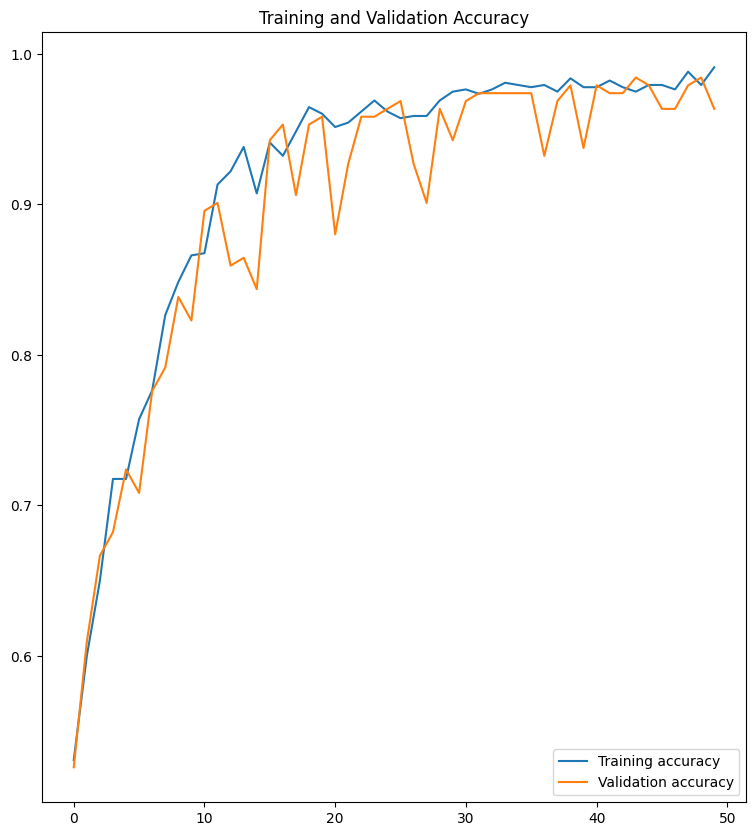

In [22]:
plt.figure( figsize=(20,10))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS), acc, label ='Training accuracy')
plt.plot(range(EPOCHS), val_acc, label ='Validation accuracy')
plt.legend(loc = 'lower right')
plt.title( "Training and Validation Accuracy")

Text(0.5, 1.0, 'Training and Validation loss')

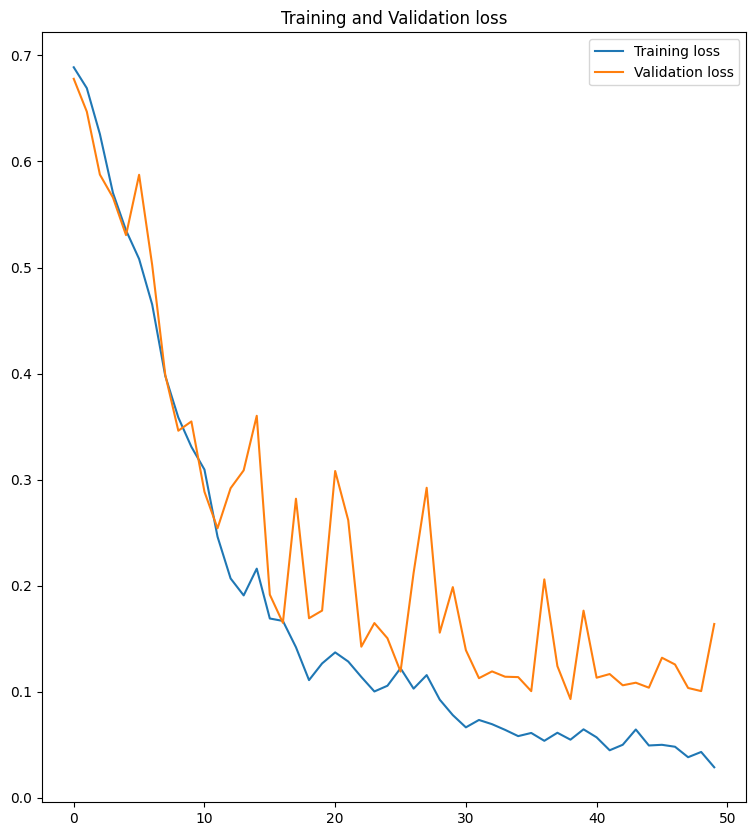

In [23]:
plt.figure( figsize=(20,10))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS), loss, label ='Training loss')
plt.plot(range(EPOCHS), val_loss, label ='Validation loss')
plt.legend(loc = 'upper right')
plt.title( "Training and Validation loss")

firt image to be predicted 
actual label :  cat
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 887ms/step
predicted label dog


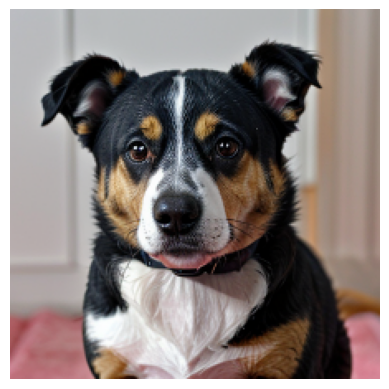

In [24]:
for images_batch, labele_batch in test_dataset.take(1):
    plt.imshow(images_batch[0].numpy().astype('uint8'))
    plt.axis(False)
    first_image = images_batch[0].numpy().astype("uint8")
    first_label = label_batch[0].numpy()
    print("firt image to be predicted ")
    plt.imshow(first_image)
    print("actual label : ", class_names[first_label])
    batch_prediction = model.predict(images_batch)
    print("predicted label",class_names[np.argmax(batch_prediction[0])])

# <font color = red> Fucntion to do the prediction

In [25]:
def predict_model(model, img):
    img_array  = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array,0) # create a batch

    predictions = model.predict(img_array)
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100*(np.max(predictions[0])),2)
    return predicted_class, confidence

# Preicting using the Test dataset

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


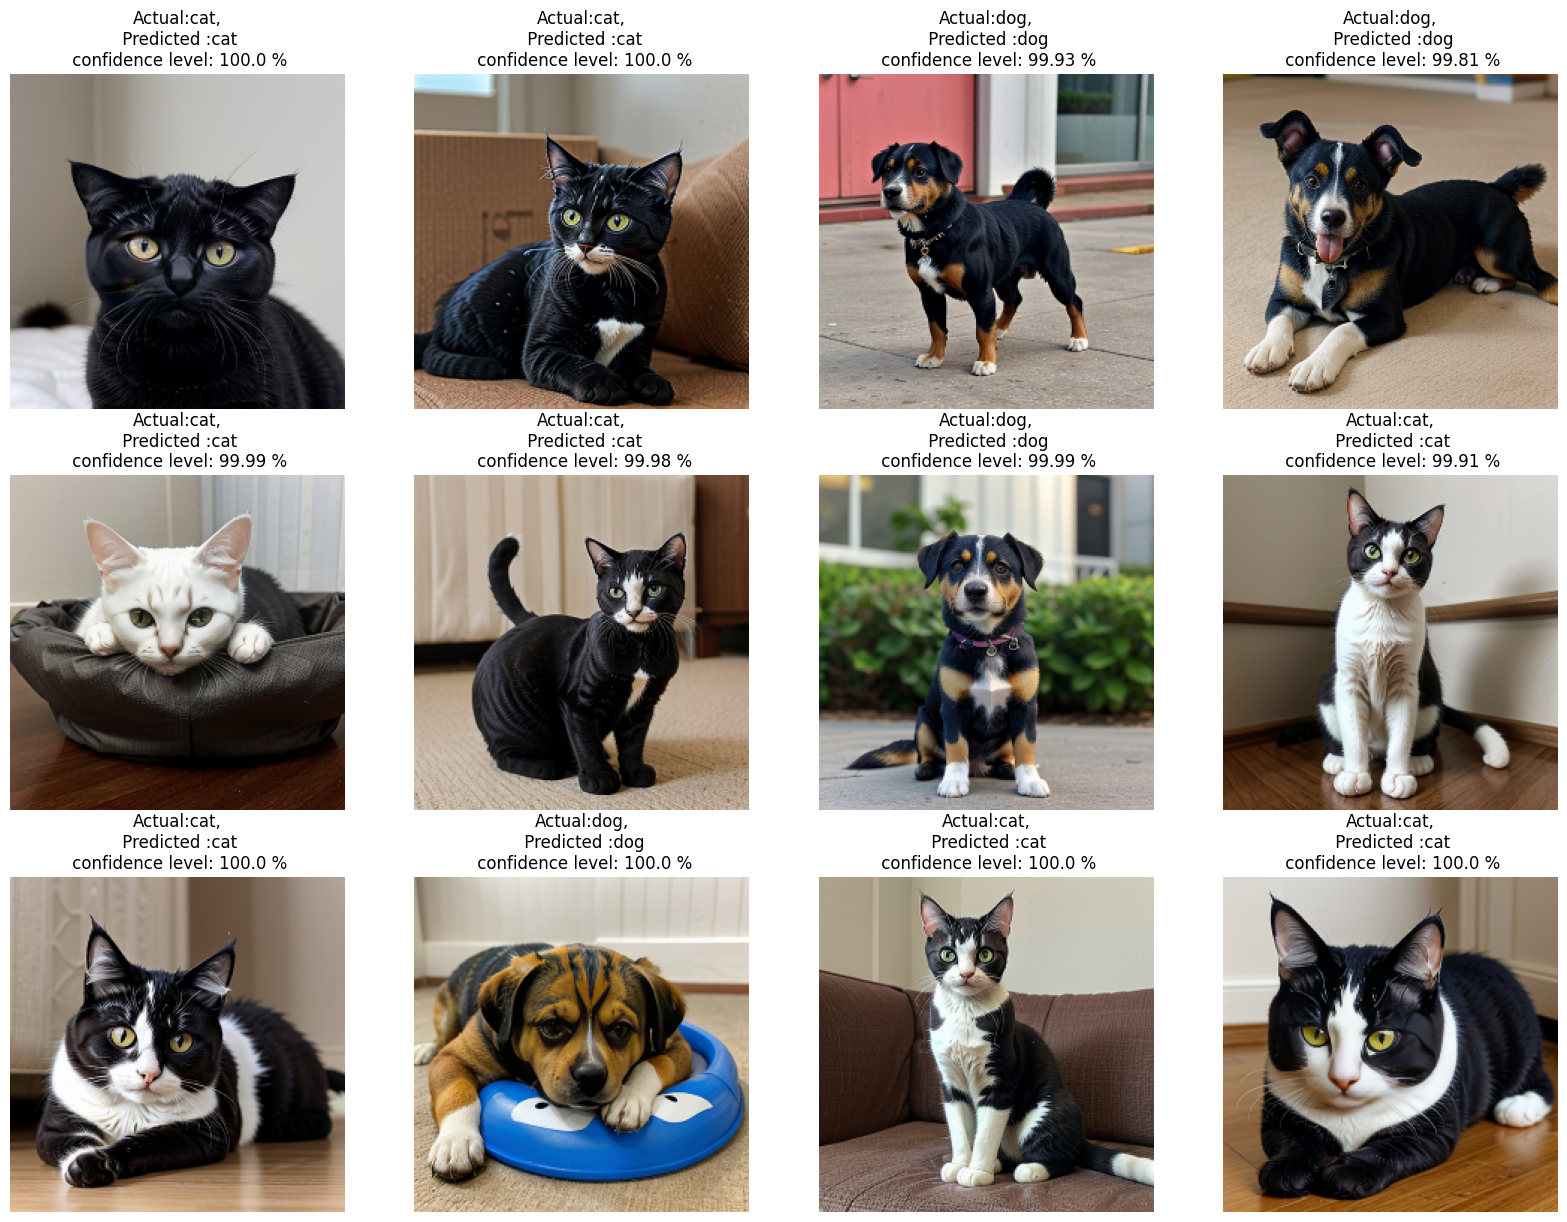

In [26]:
plt.figure(figsize=(20,20))

for images, labels in test_dataset.take(1):
    for i in range(12):
        ax = plt.subplot(4,4,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))

        predicted_class, confidence = predict_model(model, images[i].numpy())
        actual_class = class_names[labels[i]]
        plt.title(f"Actual:{actual_class},\n Predicted :{predicted_class}\n confidence level: {confidence} %")
        plt.axis(False);

# Saving the model